In [2]:

import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", 400)
pd.set_option('display.max_columns', 50)
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.float_format = '{:.6f}'.format

In [3]:
fantom_applications = pd.read_csv('./public_data/fantom_grant_applications.csv') 
fantom = pd.read_csv('./public_data/fantom_grant_votes.csv') 
# fantom.info()
# fantom.head() 
fantom_applications.info() # 107
# fantom_applications.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                107 non-null    object
 1   project                           107 non-null    object
 2   status                            107 non-null    object
 3   created_at                        107 non-null    object
 4   updated_at                        107 non-null    object
 5   application_round                 107 non-null    object
 6   application_recipient             107 non-null    object
 7   last_updated                      107 non-null    int64 
 8   project_id                        107 non-null    object
 9   title                             107 non-null    object
 10  description                       107 non-null    object
 11  website                           107 non-null    object
 12  github_user           

In [4]:
unicef_applications = pd.read_csv('./public_data/unicef_grant_applications.csv') 
unicef = pd.read_csv('./public_data/unicef_grant_votes.csv') 
# unicef.info()
# unicef.head()

unicef_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12 non-null     object 
 1   project                12 non-null     object 
 2   status                 12 non-null     object 
 3   created_at             12 non-null     object 
 4   updated_at             12 non-null     object 
 5   application_round      11 non-null     object 
 6   application_recipient  11 non-null     object 
 7   last_updated           11 non-null     float64
 8   project_id             11 non-null     object 
 9   title                  11 non-null     object 
 10  description            11 non-null     object 
 11  website                11 non-null     object 
 12  project_github         9 non-null      object 
 13  project_twitter        10 non-null     object 
 14  github_user            5 non-null      object 
dtypes: float

In [163]:

# fantom[fantom.duplicated(subset=['id'])].count()
# unicef[fantom.duplicated(subset=['id'])].count()
tokens = unicef['token'].unique()
tokens

# fantom_token = fantom['token'].unique()
# fantom_token
# print(fantom['destination_wallet'].unique().shape) # 88
# print(unicef['destination_wallet'].unique().shape) # 10

array(['0x0000000000000000000000000000000000000000',
       '0x6b175474e89094c44da98b954eedeac495271d0f'], dtype=object)

In [170]:

unicef["decoded_amount"] = unicef["amount"].str[:-8]
# unicef[unicef["decoded_amount"] == '0']
unicef["decoded_amount"] = unicef["decoded_amount"].astype('float64') / (1e10)
unicef["decoded_amount"].describe()
unicef["round"] = "unicef"
unicef["amount_usd"] = None
eth_price = 1200
unicef.loc[unicef['token']=='0x0000000000000000000000000000000000000000','amount_usd']= unicef['decoded_amount'] * eth_price
unicef.loc[unicef['token']!='0x0000000000000000000000000000000000000000','amount_usd']= unicef['decoded_amount']
# unicef[unicef["token"] != "0x0000000000000000000000000000000000000000"].head()
unicef.loc[unicef['token'] == '0x0000000000000000000000000000000000000000','token_symbol']= "ETH"
unicef.loc[unicef['token'] == '0x6b175474e89094c44da98b954eedeac495271d0f','token_symbol']= "DAI"
# unicef[unicef["amount_usd"] == 0].head()
unicef.groupby("token_symbol").count()
unicef_cleaned = unicef[['round','id', 'source_wallet', 'destination_wallet', 'amount_usd', 'token_symbol']]
unicef_cleaned

,round,id,source_wallet,destination_wallet,amount_usd,token_symbol
0,unicef,11f159yjRryCZgNBebpqaa8FUCpApzNtkW2SBpY9EQL,0xe95ab07a55e8489fe8e81e3281c8b3fd95c7d8af,0xd27e1a1a60ebc1b70f4cae5265092c0f6edc7f9d,1.200000,ETH
1,unicef,121Bu9DQH2XYZRmpc4MBME9u31VbztuffyzZawSHyx5W,0x7d1ef741c40ddffdd4f19549d42fed9a0193f8ea,0x39d77e51c485f1ff65b1b3b42e9f67cda221f597,1.020000,ETH
2,unicef,121BYEFrztQ8dvngkt2AWtnt6xPMmN2zjhoBC8R3u1cq,0xbc70bc022ebc5e4cc99e7ecc3b69f6ab47f43c3c,0x39d77e51c485f1ff65b1b3b42e9f67cda221f597,0.018000,ETH
3,unicef,122Ha1gzuyYsPxqJtRzhr7uFKtpxn7eMuW9wW2xnKyBg,0x329c787b163a730bd7900df2beb3ff4fe4670375,0x8ddfa84bbf59c0e6dbd05a56e9b9931b64255f08,0.120000,ETH
4,unicef,124h8Un1Gr6ALnvowt3fUPUVrnHwjcrGqPctV9x1esfh,0x49c9fb3402dc8a7f36b784d42aef56639dc89178,0x0e5c6c79f44a19d98dd58d4c22d3a2fbd555eebe,0.120000,ETH
...,...,...,...,...,...,...
64175,unicef,ZyeeNyEyf2DtzhHW2zGNRzspKvUfBw5ES47mPq2ygoT,0xa944e92483ddc42e70358760d4a5276be8e82767,0x6078c8eeb7ed8916a8f1e85dc8f6e780c09a89ff,0.120000,ETH
64176,unicef,ZYgRkSwRZKa1wTwtbrGHfjXSBadLcaEw6s4p5TRrThw,0x9cb6b0a109ad9b1f029107f40737f6ceb64d356b,0x6078c8eeb7ed8916a8f1e85dc8f6e780c09a89ff,1.200000,ETH
64177,unicef,zyKixuBf5Y33WRVn4mEM3gm8Q1DwmAfy6KhsbZUwY7K,0x43cb33e6f2bada9d359e31d42b7da5ee848100a9,0x6078c8eeb7ed8916a8f1e85dc8f6e780c09a89ff,1.272000,ETH
64178,unicef,ZzpcqAFmmUdJ98fp9W27ZWBrBw5DLQWffBHjLL8PrtT,0x95f3955648d5dca694880cef87df9f368ef78728,0x6078c8eeb7ed8916a8f1e85dc8f6e780c09a89ff,0.480000,ETH


In [169]:

fantom["decoded_amount"] = fantom["amount"].str[:-8]

fantom = fantom[fantom["amount"] != '0']
fantom["decoded_amount"] = fantom["decoded_amount"].astype('float64') / (1e10)
fantom["round"] = "fantom"
# fantom["decoded_amount"].describe()
fantom["amount_usd"] = None
ftm_price = 0.21
fantom.loc[fantom['token']=='0x0000000000000000000000000000000000000000','amount_usd']= fantom['decoded_amount'] * ftm_price
fantom.loc[fantom['token']!='0x0000000000000000000000000000000000000000','amount_usd']= fantom['decoded_amount']
# fantom[fantom["token"] != "0x0000000000000000000000000000000000000000"].head() 
fantom.loc[fantom['token'] == '0x0000000000000000000000000000000000000000','token_symbol']= "FTM"
fantom.loc[fantom['token'] == '0xc931f61b1534eb21d8c11b24f3f5ab2471d4ab50','token_symbol']= "BUSD"
fantom.loc[fantom['token'] == '0x21be370d5312f44cb42ce377bc9b8a0cef1a4c83','token_symbol']= "WFTM"
fantom.loc[fantom['token'] == '0x8d11ec38a3eb5e956b052f67da8bdc9bef8abf3e','token_symbol']= "DAI"
fantom.groupby("token_symbol").count()
fantom_cleaned = fantom[['round','id', 'source_wallet', 'destination_wallet', 'amount_usd', 'token_symbol']]

,round,id,source_wallet,destination_wallet,amount_usd,token_symbol
0,fantom,113dRUPwQJ9tTfeqeMRq2Mn8kfYrNyakTPdEhqFkVSe,0x06cd8288dc001024ce0a1cf39caaedc0e2db9c82,0xe126b3e5d052f1f575828f61feba4f4f2603652a,0.210000,FTM
1,fantom,11n4hU8NKy7gr5oBqJ1AeEyBKV7L47JGLpbrskoDBcf,0x9be7d88cfd6e4b519cd9720db6de6e6f2c1ca77e,0x7d658841f8ba93299970f6e765c2ce205f1e70dd,1.029000,FTM
2,fantom,121GYrfeHauo1PYZFjgWgdAAJnFL8JGNkSauUM8XysS3,0xf8bde71eb161bd83da88bd3a1003eef9ba0c7485,0x9a8568782896c4d4153b8b4d7e440e84e2c2cfbb,0.210000,FTM
3,fantom,121TsER62NNHzRq8MojbiC5gRSFiTaFM3LkHUFFxu1i4,0x1994bc4f630a373ffc3ecef84165cfb85e7f7820,0xf28ef4580f514eca5c1b75d0db9b0cb6d62d83ef,0.060900,FTM
4,fantom,122jc868KSeMmaMezGebsLd9LMhRk1QgMVLj1z2yY3LS,0x13ef1086cdfecc00e0f8f3b2ac2c600f297dc333,0x7ea6b8906a0b33cbdb9582d31364f522395eb0ea,0.597303,FTM
...,...,...,...,...,...,...
139332,fantom,zZHbzty3kpakicygboUmFanVUrXw14itXwbRh8aJH3W,0x9a74ec99bd88eca680485da7f32fca05af375dcf,0xda0d1b7995e652288ac13540915b899a51d2be50,0.105000,FTM
139333,fantom,zZLKvx8Z6SmRNseE4vmFxfZYVS1HPixJBwGnu4RbSzh,0x3ca0eb2c2db71c819fdd4d7a94e47adf2f4bb1ba,0x112e372bb5ec17c1ea6b1d679ea72afbd2a94404,0.021000,FTM
139334,fantom,zZRNJU9nR71i6ZZhp5WgivCYNchZhkjsXksjtzjCuum,0xbe1bd91b57ce069ce85ec5304cf9d206a3be85df,0x879e5ea3f8b0d5e368a59f79ad8969025953b1f1,1.470000,FTM
139335,fantom,zZVnxEoeJwqPsnMvqRba5ZChqaMtjU4mMgALBxCEiLq,0x6273957eb6707f6e935d8b190bd239ccae0eb7cb,0x76c354c136fa7518f87d92e3d8fae40c0261ec19,0.010500,FTM


In [186]:
gr15 = pd.read_csv('./public_data/gr15_contributions.csv') 
gr15_grants = pd.read_csv('./public_data/gr15_grants.csv') 
gr15_grants = gr15_grants[['grant_id', 'address']]
gr15 = gr15.merge(gr15_grants, on='grant_id')

gr15_cleaned = pd.DataFrame()

gr15_cleaned['id'] = gr15['txn_id']
gr15_cleaned['source_wallet'] = gr15['address_x']
gr15_cleaned['destination_wallet'] = gr15['address_y']
gr15_cleaned['amount_usd'] = gr15['amount_in_usdt']
gr15_cleaned['token_symbol'] = gr15['token']
gr15_cleaned["round"] = "gr15"
gr15_cleaned = gr15_cleaned[['round','id', 'source_wallet', 'destination_wallet', 'amount_usd', 'token_symbol']]

gr15_cleaned

,round,id,source_wallet,destination_wallet,amount_usd,token_symbol
0,gr15,9a7955760b945121d7ac2e3ccf8c53bb19389939d83a78dba0a03d21def8dbea,0x76f69dcddd0593b0aff5fd3280c3433ddb68e0d2,0x01d79BcEaEaaDfb8fD2F2f53005289CFcF483464,1.283650,ETH
1,gr15,ce49d1e0247cef5631c85234edf52a9642e53d84daebde07748ee2c25533ab37,0x88f74515cb136609eaa538f71c0e7dadd537d594,0x01d79BcEaEaaDfb8fD2F2f53005289CFcF483464,1.026920,ETH
2,gr15,c07bb51b92d724889d80841ad4064f59a8d6e504532cca0ddd5ea5dab8dd3c6e,0x5a756d9c7caa740e0342f755fa8ad32e6f83726b,0x01d79BcEaEaaDfb8fD2F2f53005289CFcF483464,1.000092,ETH
3,gr15,c16176914470a32df19f286a923bdb66b2ace067fdc201fe4b76f102351d434b,0x1becad9d2a9cbf25b29bc7b5600a2d1519e3d63b,0x01d79BcEaEaaDfb8fD2F2f53005289CFcF483464,1.065430,ETH
4,gr15,b2e6bd706729d663b3549df5c1d2eacf643050331e229daa5153ee4d67889986,0x4820deb7bbf154739af8e446032b2647f3efcaf9,0x01d79BcEaEaaDfb8fD2F2f53005289CFcF483464,1.200000,USDC
...,...,...,...,...,...,...
432332,gr15,0bf0d43ffc29313cb0949df375bae06c269ebec99609223d038a11372716d8a4,0x2527fedd0eb265b82126c7fec1ede54199302ecd,0xA6302d910ef1953b92E1435698A25c87cd30E5d8,1.566455,ETH
432333,gr15,6c5e30bb996971951661639b827517006ea5f7c82571b3732ef68af9055dbf0b,0x4d81d3ca393f6c0cf8fdb95a5a0ced54886986c2,0x1e9DB5758BF3a5C179996547f4a8990Ce047f882,1.010000,DAI
432334,gr15,f6aeace5fe7ab5db4067d99b2b4067be9ce883702efd277eef55e91fac8c99a0,0xe6b721127c7b041f36032f1e399239aec67a9990,0x1047a2Db65cDcbE4CCe6025A74E972423ceE8400,1.253164,ETH
432335,gr15,78019c5feb325f715c72a6781aa20dce5797a293bb0ba43587b5f1a686c8ea06,0xcbbd18d3ac27ab0fffd04bccd091b2802c92e0ca,0x6C8bdE31530Ca3382150Fb18e17D8f920CcF86BE,1.000000,USDC


In [187]:
combined = pd.concat([fantom_cleaned, unicef_cleaned, gr15_cleaned])
combined.to_csv('./analytics_data/combined_contributions.csv', index=False)

<AxesSubplot: xlabel='round', ylabel='amount_usd'>

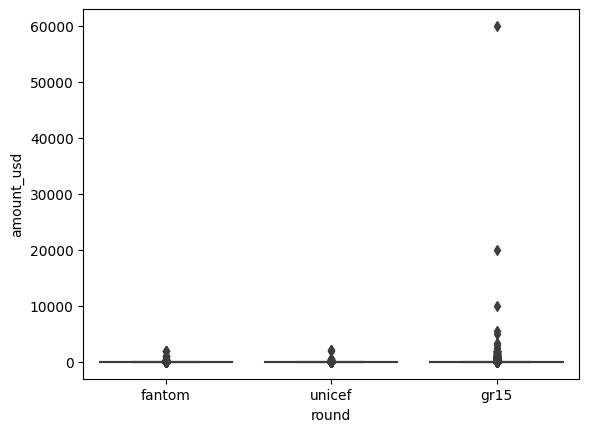

In [188]:
contributions = pd.read_csv('./analytics_data/combined_contributions.csv') 
contributions["amount_usd"].sum()
sns.boxplot(x='round', y='amount_usd', data=contributions)

In [193]:
grants = contributions.groupby(['round', 'destination_wallet']).sum()[['amount_usd']]
grants['total_contributions'] = contributions.groupby(['round', 'destination_wallet']).count()['id']
grants['total_contributors'] = contributions.groupby(['round', 'destination_wallet']).nunique()['source_wallet']
grants['avg_amount_usd'] = grants['amount_usd'] / grants['total_contributions']
grants.reset_index(inplace=True)

# grants[grants['round'] == 'fantom'].describe()
# grants[grants['round'] == 'unicef'].describe()
grants.groupby('round').describe()
# grants[grants['destination_wallet'] == '0x007db5de853d723a96e0e28cce72cca897b00ecf']
# sns.boxplot(x='round', y='amount_usd', data=grants)
# sns.boxplot(x='round', y='avg_amount_usd', data=grants)

/var/folders/gl/3nbwj5r1183_gfp3xql0hclr0000gn/T/ipykernel_62248/2229047245.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grants = contributions.groupby(['round', 'destination_wallet']).sum()[['amount_usd']]


amount_usd                                                  \
             count        mean         std         min         25%   
round                                                                
fantom   88.000000 1163.315423 1561.969964   89.376474  215.477893   
gr15   1433.000000 1183.480378 4754.871718    1.000000    6.001310   
unicef   10.000000 9580.818803 2371.412459 6495.832919 8358.275967   

                                             total_contributions              \
               50%          75%          max               count        mean   
round                                                                          
fantom  471.052351  1490.538002  6739.873256           88.000000 1583.363636   
gr15     48.974657   537.151265 83022.551059         1433.000000  301.700628   
unicef 8763.286662 10307.790133 14680.735430           10.000000 6418.000000   

                                                                    \
               std         min         25%         50%         75%   
round                                                                
fantom 1263.182754  795.000000  919.500000 1046.000000 1625.000000   
gr15   1547.896416    1.000000    2.000000   10.000000   80.000000   
unicef  977.405864 5526.000000 5728.250000 6348.000000 6595.750000   

                    total_contributors                                      \
                max              count        mean         std         min   
round                                                                        
fantom  7048.000000          88.000000 1520.920455 1217.543421  764.000000   
gr15   32458.000000        1433.000000  282.463364 1427.904777    1.000000   
unicef  8880.000000          10.000000 6220.000000  932.372482 5359.000000   

                                                        avg_amount_usd  \
               25%         50%         75%          max          count   
round                                                                    
fantom  878.500000 1001.500000 1555.250000  6690.000000      88.000000   
gr15      2.000000    9.000000   76.000000 29369.000000    1433.000000   
unicef 5554.250000 6158.500000 6397.000000  8562.000000      10.000000   

                                                                           
           mean       std      min      25%      50%      75%         max  
round                                                                      
fantom 0.601251  0.559769 0.107943 0.209382 0.386370 0.749525    2.563860  
gr15   8.344615 32.801241 0.858682 1.669237 3.538707 6.696523 1000.000000  
unicef 1.494294  0.306656 1.143431 1.282435 1.435999 1.617054    2.217953